In [184]:
import pandas as pd
import numpy as np      
import matplotlib.pylab as plt
import seaborn as sns
from itables import show
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [185]:
#Import de dataset de mon github
import pandas as pd

# Si le fichier est dans le même dossier que ton notebook :
survie = pd.read_csv("gender_submission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

#Comparaison des colonnes de test et train 
print("Colonnes de train : ", train.columns)
print("Observations de train : ", len(train))
print("Colonnes de test : ", test.columns)
print("Observations de test : ", len(test))

Colonnes de train :  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Observations de train :  891
Colonnes de test :  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Observations de test :  418


On voit que le df train a une colonne supplémentaire : survived (0,1)

# Data cleaning

In [186]:
# Changement des types
train['PassengerId'] = train['PassengerId'].astype(str)

# La variable pclass est un proxy. On crée sa colonne correspondante
train['Classe'] = train['Pclass'].map({1: 'Première', 2: 'Deuxième', 3: 'Troisième'})
# On réorganise les modalités de Classe
train['Classe'] = pd.Categorical(train['Classe'], 
                                 categories=['Première', 'Deuxième', 'Troisième'], 
                                 ordered=True)

# Exploratory Data Analysis (EDA)

In [187]:
train.shape

(891, 13)

In [188]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Classe           0
dtype: int64

## Statistiques descriptives

In [189]:
show(train.describe())

Loading ITables v2.4.4 from the internet... (need help?)


In [190]:
train.describe(include=['object'])

,PassengerId,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,891,891,2,681,147,3
top,1,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,1,577,7,4,644


In [191]:
# Tableau de fréquence des variables catégorielles à modalité
train['Classe'].value_counts(normalize=True)*100
train['Embarked'].value_counts(normalize=True)*100
train['Sex'].value_counts(normalize=True)*100

# ou via une boucle pour tout afficher
colonnes = ['Classe', 'Embarked', 'Sex']

for col in colonnes:
    print(f"\n")
    print(train[col].value_counts(normalize=True).round(3) * 100)




Classe
Troisième    55.1
Première     24.2
Deuxième     20.7
Name: proportion, dtype: float64


Embarked
S    72.4
C    18.9
Q     8.7
Name: proportion, dtype: float64


Sex
male      64.8
female    35.2
Name: proportion, dtype: float64


## Graphiques 
### Skewness - Dispersion

<Axes: xlabel='Survived', ylabel='count'>

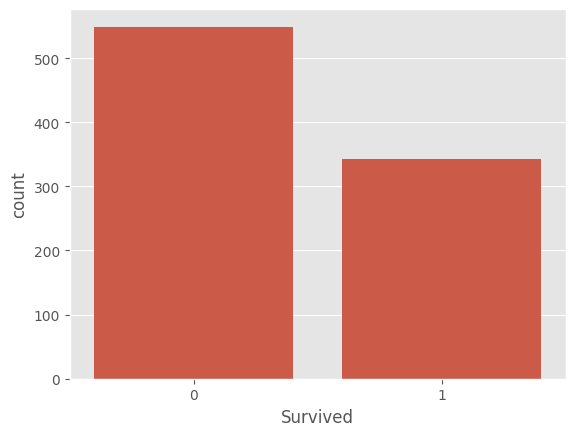

In [192]:
sns.countplot(x = 'Survived', data=train)

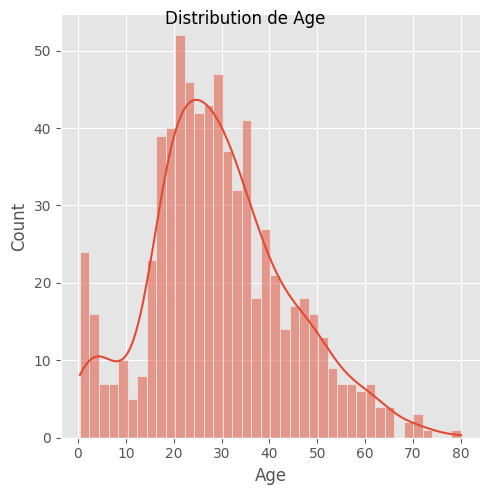

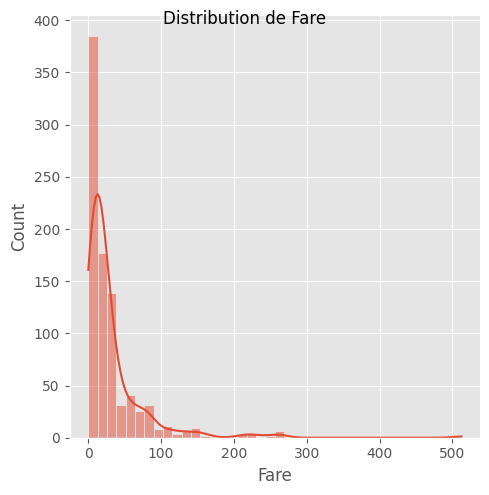

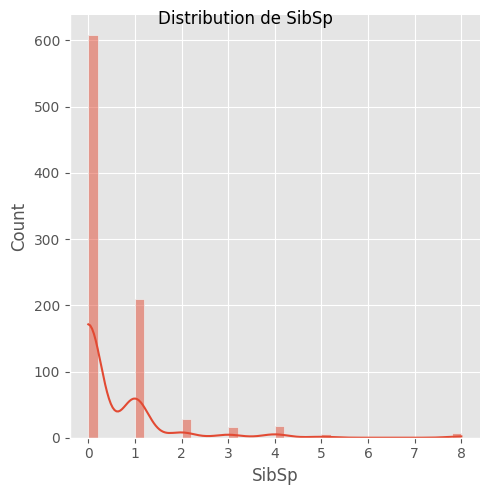

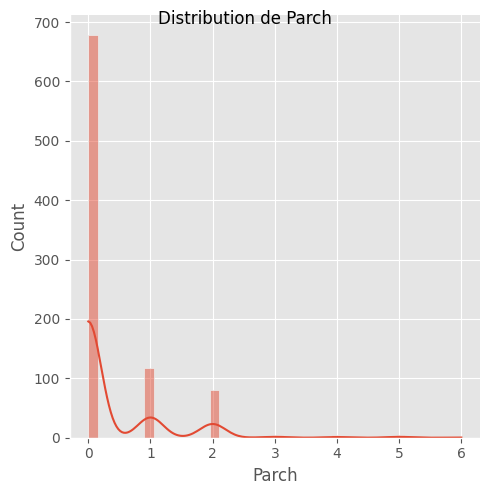

In [193]:
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    sns.displot(train[col], bins=40, kde=True).fig.suptitle(f"Distribution de {col}")
    plt.show()

### Mesures de dispersion

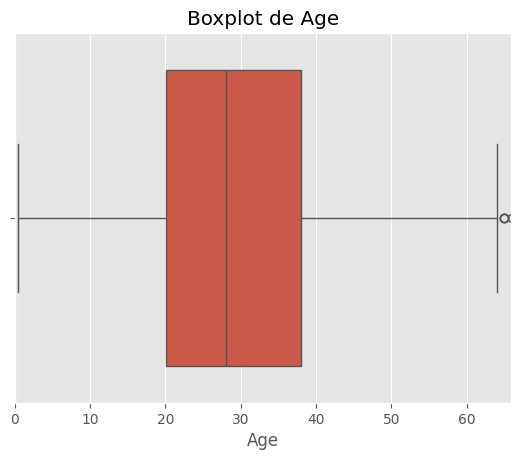

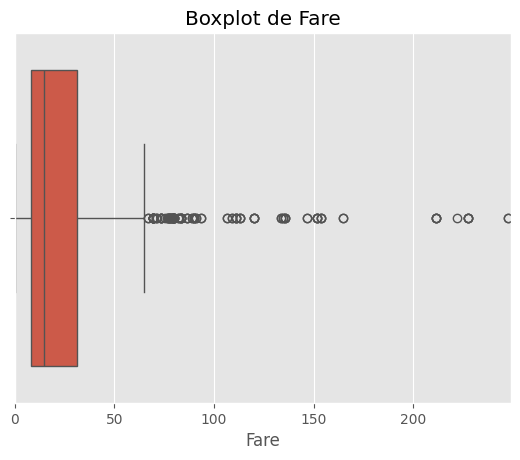

In [194]:
#plt.boxplot(x=train['Fare'])
for col in ['Age', 'Fare']:
    sns.boxplot(x=train[col])
    max_val = train[col].quantile(0.99)  # limite à 99% des données
    plt.xlim(0, max_val)
    plt.title(f"Boxplot de {col}")
    plt.show()


### Mesures de forme de la distribution

Asymétrie (skewness) et kurtose (kurtosis).


In [195]:
train['Fare'].skew()

np.float64(4.787316519674893)

Valeur est supérieure à 1 => valeurs fortement asymétriques (ou très asymétriques)

In [196]:
train['Fare'].kurt()

np.float64(33.39814088089868)

33,40 est largement supérieure à 3 → donc kurtose excédentaire = 30,40
- Cela indique une distribution très leptokurtique :
- Pic très pointu au centre (la majorité des passagers ont payé un tarif proche de 0–50)
- Extrémités très longues et épaisses (certains passagers ont payé des tarifs très élevés, > 100 voire > 500)

## Analyse croisée - Causal research

### Proche horizontaux et proches verticaux

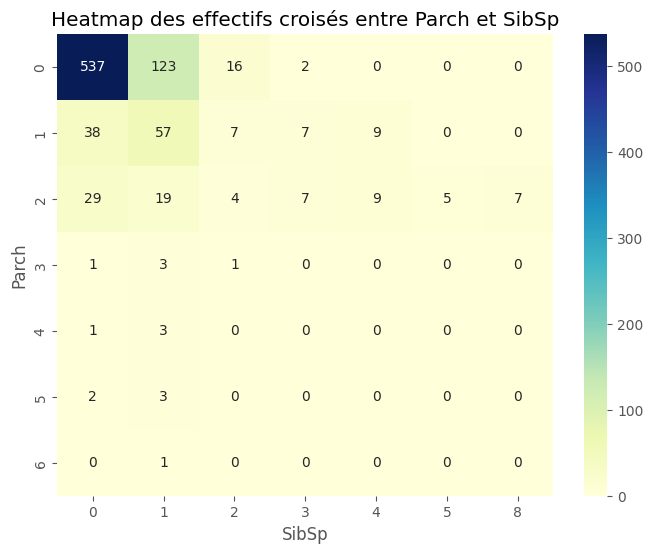

In [197]:
# Heatmap nombre de conjoint/sigblings et nombre de parents/enfants
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(train['Parch'], train['SibSp']), 
            annot=True, fmt='d', cmap='YlGnBu')
plt.title("Heatmap des effectifs croisés entre Parch et SibSp")
plt.xlabel("SibSp")
plt.ylabel("Parch")
plt.show()

### Survie par âge, sexe, classe, fare

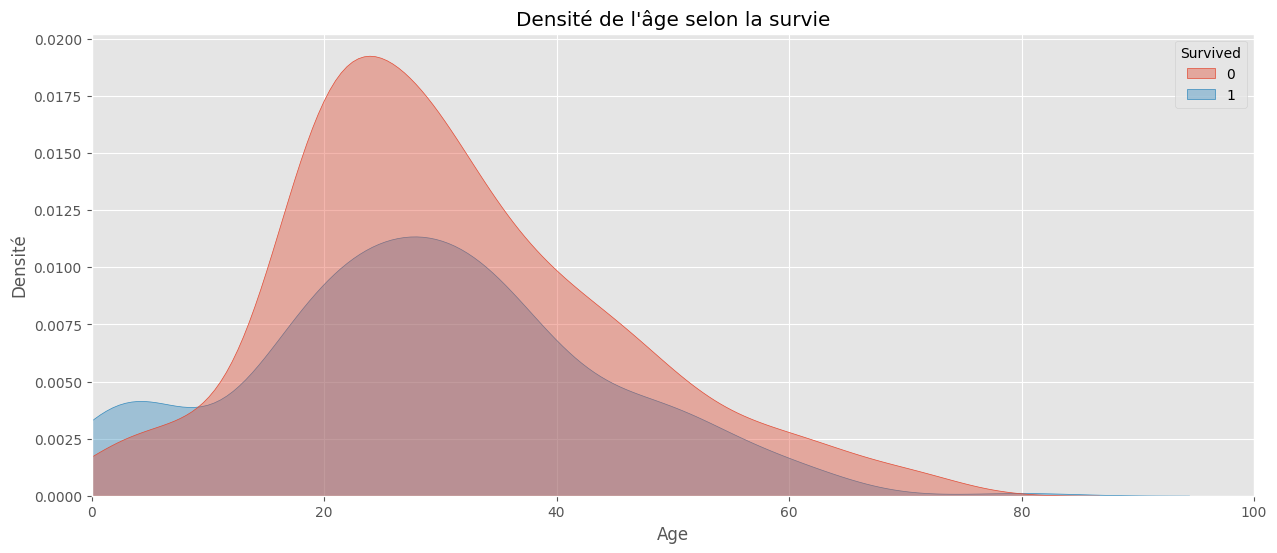

In [210]:
plt.figure(figsize=(15, 6))

sns.kdeplot(data=train, x='Age', hue='Survived', fill=True, alpha=0.4)

plt.title("Densité de l'âge selon la survie")
plt.xlim(0, 100)
plt.xlabel("Age")
plt.ylabel("Densité")

plt.show()

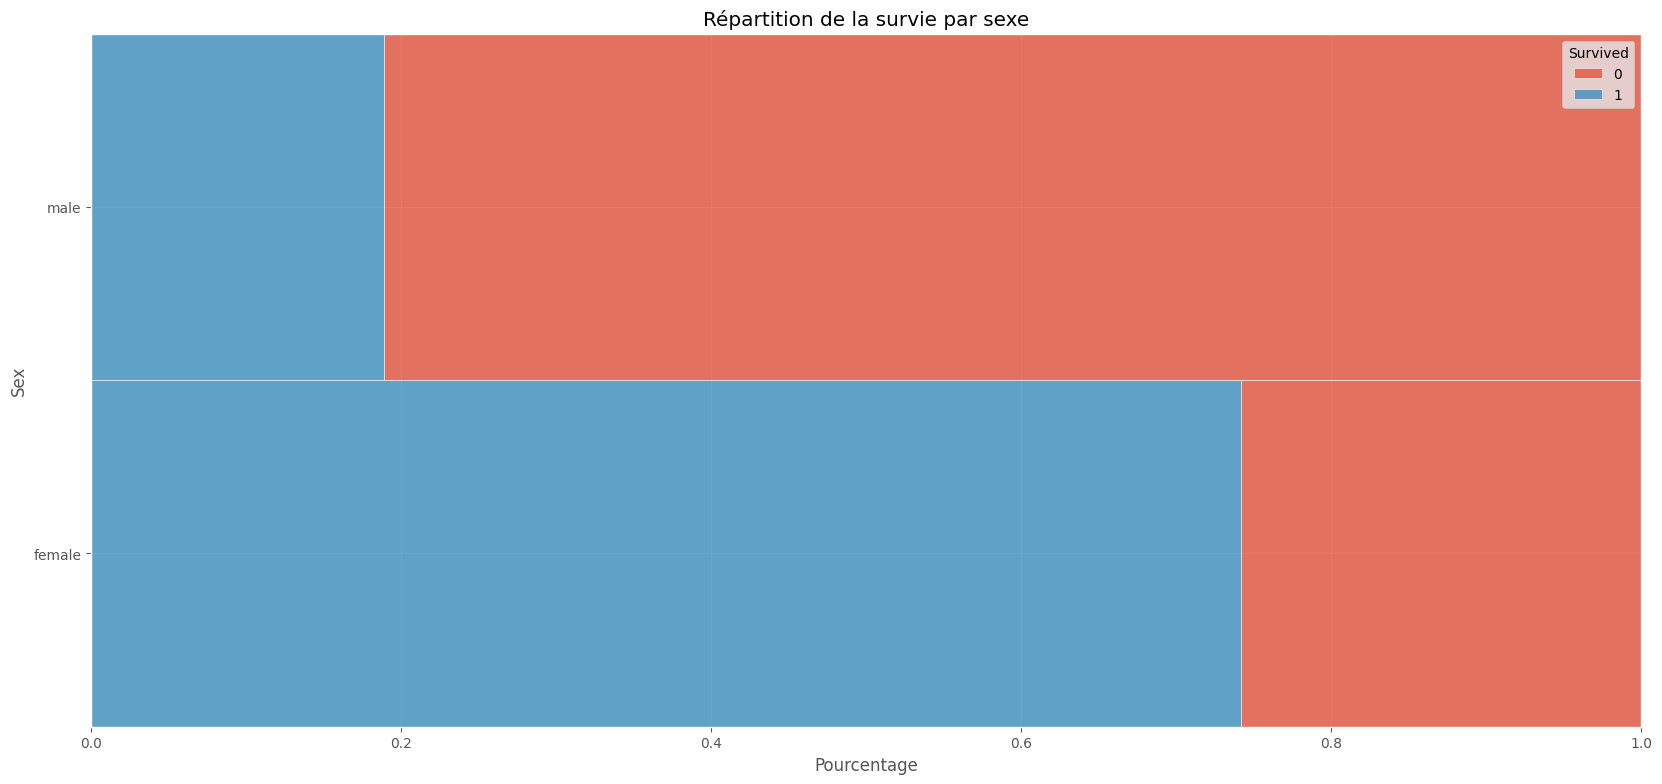

In [223]:
plt.figure(figsize=(20, 9))

# Barres empilées 100% horizontales
sns.histplot(data=train, y='Sex', hue='Survived', multiple='fill', stat='percent')  # ordre inversé pour y

plt.xlabel('Pourcentage')
plt.title("Répartition de la survie par sexe")
plt.show()


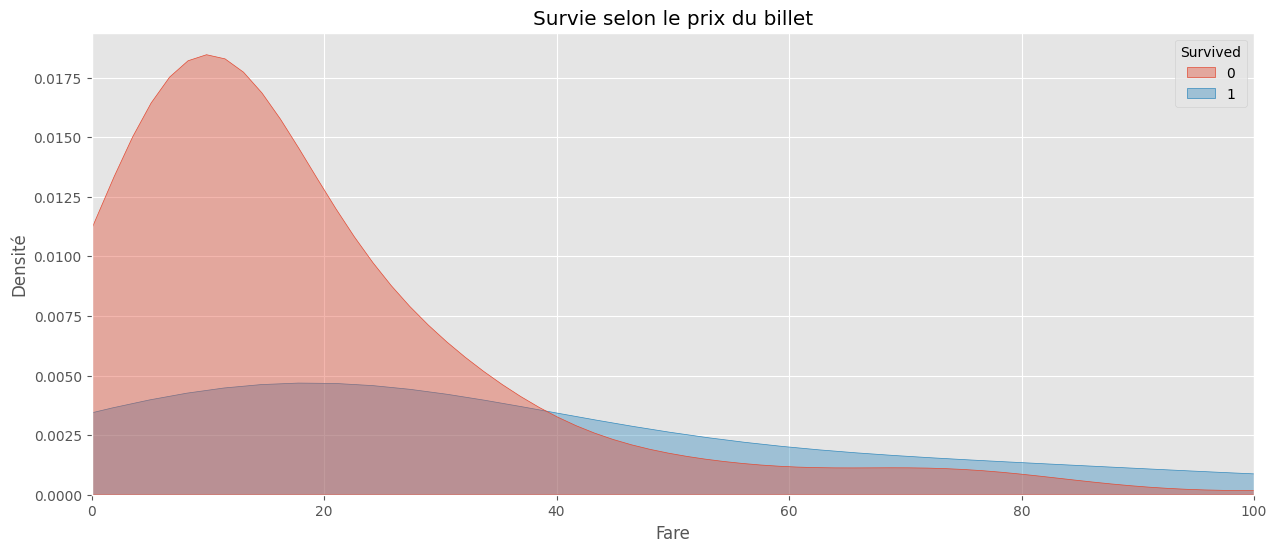

In [212]:
plt.figure(figsize=(15, 6))

sns.kdeplot(data=train, x='Fare', hue='Survived', fill=True, alpha=0.4)

plt.title("Survie selon le prix du billet")
plt.xlim(0, 100)
plt.xlabel("Fare")
plt.ylabel("Densité")

plt.show()

Text(0.5, 1.0, 'Survie selon la classe')

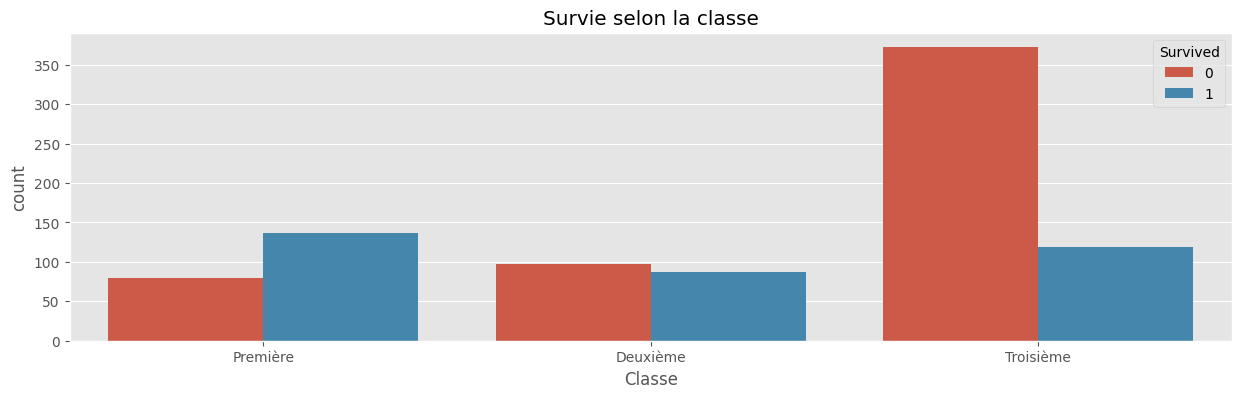

In [207]:
# Survie selon la classe
plt.figure(figsize=(15, 4))
sns.countplot(x='Classe', hue='Survived', data=train)

plt.title("Survie selon la classe")